# "Microsoft Studios:"
>### _How should Microsoft Enter the Movie Business?_
>##### __G. Haws & K. Hayes__
>###### July 31, 2019
***
>*Sources:\
TheMovieDB.org\
Box Office Mojo\
IMBD*

### Questions to Consider:

>### - In order to maximize its ROI, what types of films should Microsoft produce?
>### - What types of studios should Microsoft emulate?
>### - Which directors should Microsoft seek?

To address these questions, we will perform expoloratory data analysis to map the features of the dataset.  We hope this exercise will reveal possible areas for further research.

### Step One: Import the Tools...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Microsoft_Clean import *
from Microsoft_Dataviz import *

### Step Two: Import the Data...

In [2]:
tn_budget = pd.read_csv('Data/Zipped_Data/tn.movie_budgets.csv.gz',\
                        compression='gzip')
bom_gross = pd.read_csv('Data/Zipped_Data/bom.movie_gross.csv.gz',\
                        compression='gzip')
imbd_basics = pd.read_csv('Data/Zipped_Data/imdb.title.basics.csv.gz',\
                          compression='gzip')
imbd_name = pd.read_csv('Data/Zipped_Data/imdb.name.basics.csv.gz',\
                        compression='gzip')
imbd_principals = pd.read_csv('Data/Zipped_Data/imdb.title.principals.csv.gz',\
                              compression='gzip')

### Step Three: Clean the Data...
>_* N.B. - the below is an abstraction; the actual cleaing process is rather lengthy..._  
>                 _...this code takes in a list of dataframes and condenses them into one:_

In [3]:
md_clean = Clean_Data(tn_budget, bom_gross, imbd_basics, imbd_name, imbd_principals)

Data cleaning can be labor-intensive.  Methods of cleaning our data included finding a way to first strip out any extraneous bits of irregular punctuation from the 'title' column so that we could then pass a method of eliminating duplicates.  With the movie titles harmonized and duplicates removed, we could then use this column as a key to perform operations on other elements. 

### Step Four: Data Visualizations (i.e. exploratory data analysis)...

Now that we have some clean data to work with, let's dig in!  We see below the outline of the code necessary to create a stacked bar chart comparing cost and revenue figures for movies made after 2010:


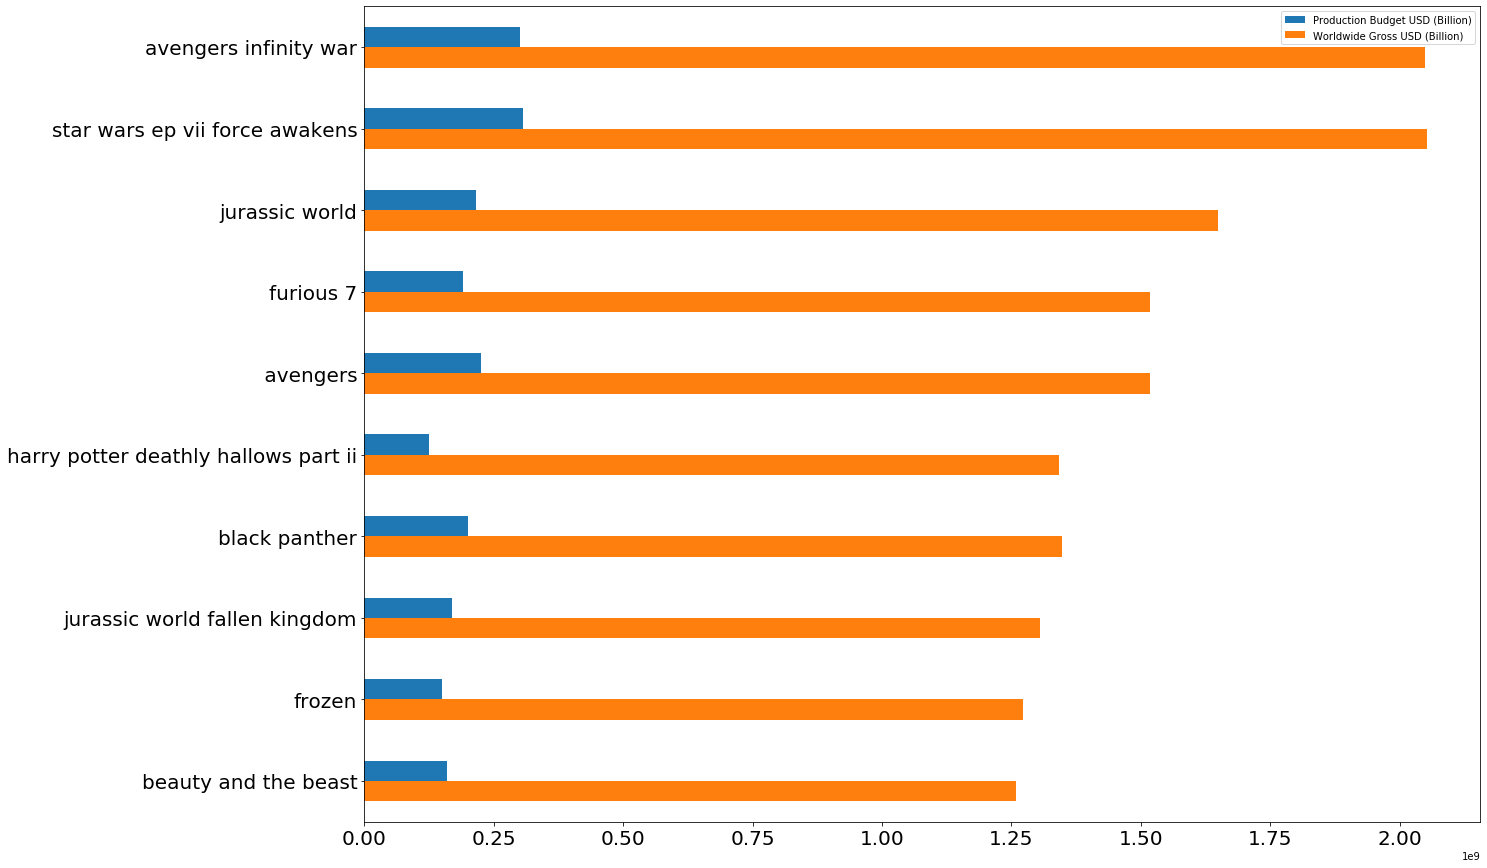

In [4]:
# Take top net profit values:
top_net = take_top_values_descending(md_clean, 'net', 10)

# Prepare our data series:
index = cast_to_list(top_net, 'title')
production_budget = cast_to_list(top_net, 'production_budget')
worldwide_gross = cast_to_list(top_net, 'worldwide_gross')

# Plot our bar chart:
df = pd.DataFrame({'Production Budget USD (Billion)':
                   production_budget,
                   'Worldwide Gross USD (Billion)':
                   worldwide_gross}, index=index)
ax = df.plot.barh(figsize=(20, 15), rot=0, fontsize=20).invert_yaxis()

Unsurprisingly, it looks like films with budgets in the low nine-figures also had the highest gross profit margins.

What if we just looked at raw profitability?  The following chart is like the one above in that the horizontal columns represent budgets and boxoffice receipts, although it is ranked (from top to bottom) ordinally by xROI multiple:

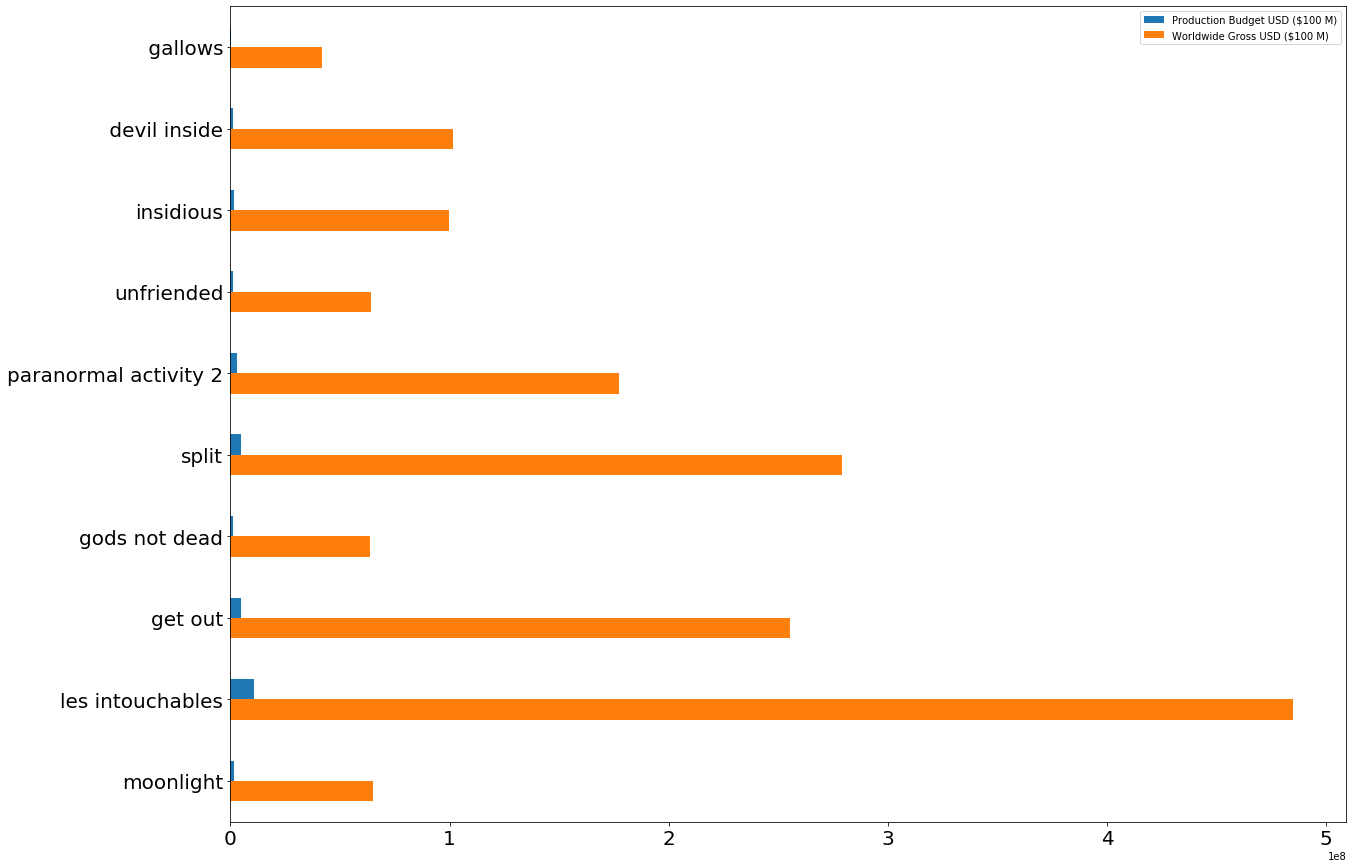

In [5]:
# Take top net profit values:
top_ratio = take_top_values_descending(md_clean, 'ratio', 10)

# Prepare our data series:
index = cast_to_list(top_ratio, 'title')
production_budget = cast_to_list(top_ratio, 'production_budget')
worldwide_gross = cast_to_list(top_ratio, 'worldwide_gross')

# ... and plot our bar chart:
df = pd.DataFrame({'Production Budget USD ($100 M)':
                   production_budget,
                   'Worldwide Gross USD ($100 M)':
                   worldwide_gross}, index=index,)
ax = df.plot.barh(figsize=(20, 15), rot=0, fontsize=20).invert_yaxis()

So, in terms of relative profitability, we are looking at an entirely different top 10, which includes a lot of low-budget horror movies and other films with a strong niche appeal to a very specific segment.  Investing in a whole portfolio of films like this would seem to be a better alternative than investing a lump sum in a single blockbuster!
***
Let's keep exploring the data.  Below we have another bar chart that examines which studios have been most profitable, on average, over time.

_(Although these data are not adjusted for timeseries, we hope this will nevertheless provide some intuition as to Who's Who...):_

In [6]:
# Creates a graph of the 20 studios with the best ROI
studio_ratio_mean = take_top_mean_descending(md_clean, 'studio', 'ratio', 0, 20)

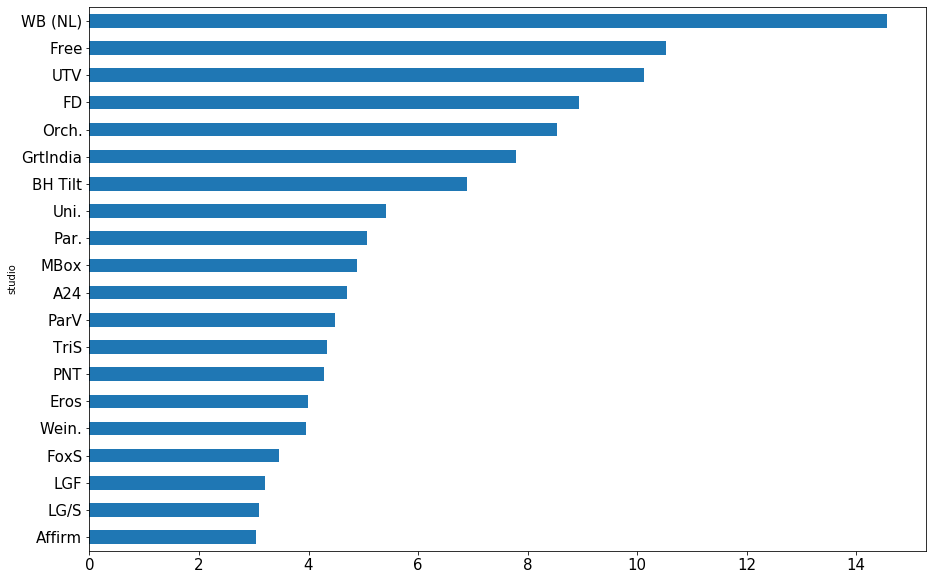

In [7]:
# ...and plot it!
studio_ratio_mean.plot(kind='barh',
                       figsize=(15, 10), fontsize=15).invert_yaxis()

Here, we again note that, although big names like Warner Bros., Paramount, and Universal factor highly among the top 20 most profitable studios, there are a good number of lesser-known production companies here too, such as Orchard studios (now owned by Sony), UTV studios (India), and Bloomhouse Studios (BH Tilt).
***
What about directors?

In [8]:
# Creates a graph of the top 20 directors (discarding outliers) with the best ROI
director_ratio_mean = take_top_mean_descending(md_clean, 'director', 'ratio', 1, 21)

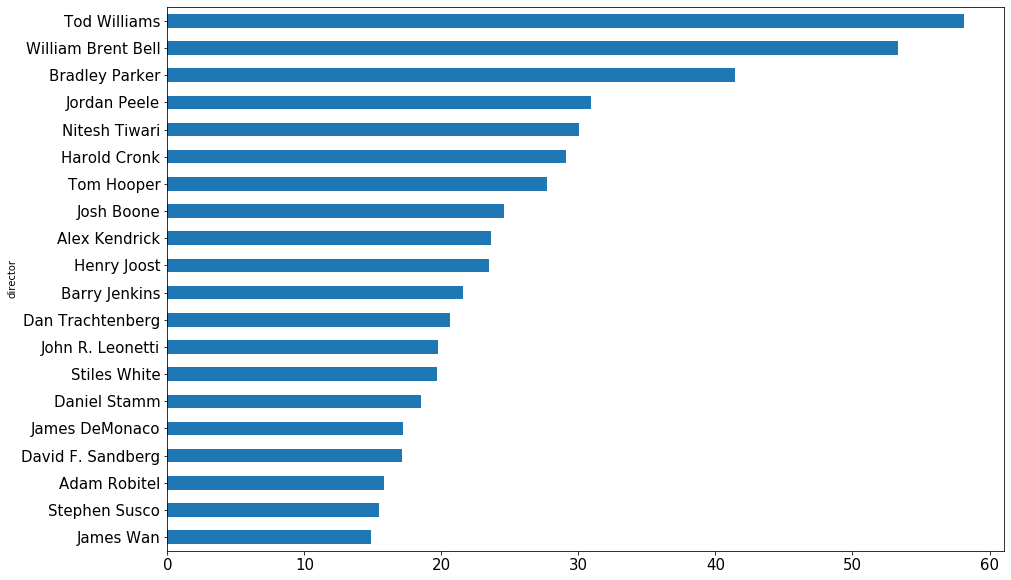

In [9]:
# ...and plot it!
director_ratio_mean.plot(kind='barh',
                       figsize=(15, 10), fontsize=15).invert_yaxis()

The above chart omits wunderkind Travis Cluff, who we regard as an outlier, and includes a good number of names that would probably not be very well-known outside of the Hollywood Hills and film afficionados.
***
This seems odd.  Perhaps we should examine further...

In [10]:
# Provides a count for the number of films made by each director with a top-20 ROI:
directors_roi_count = two_col_pivot_table_mean_nunique(md_clean, 'director', 'ratio', 'title', 1, 21)

([<matplotlib.axis.XTick at 0x7f49cecd4eb8>,
 <a list of 4 Text xticklabel objects>)

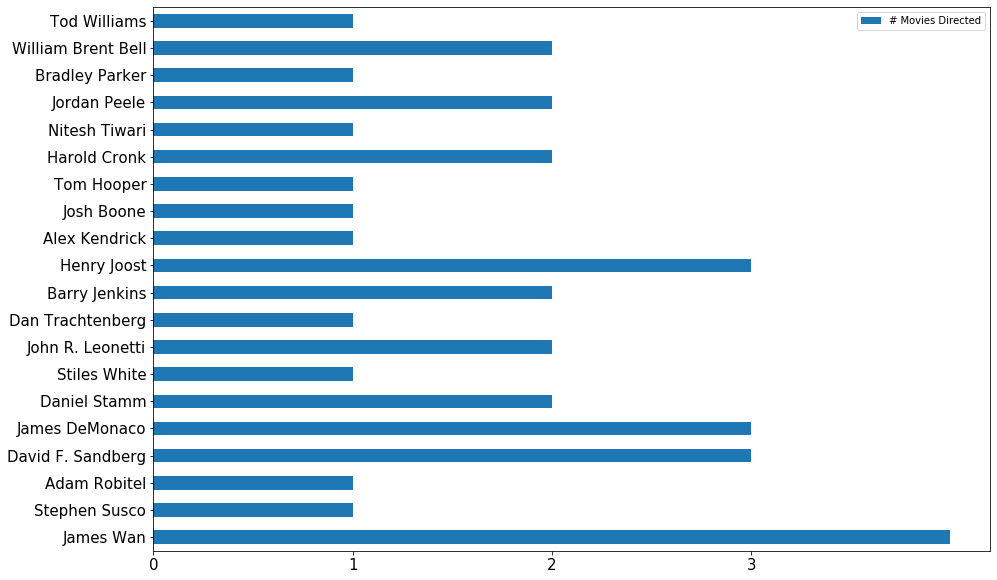

In [11]:
# Prepare our data series:
index = cast_to_list(directors_roi_count, 'director')
title_count = cast_to_list(directors_roi_count, 'title')

#Plot our bar chart:
df = pd.DataFrame({'# Movies Directed': title_count},
                  index=index)
ax = df.plot.barh(figsize=(15, 10), rot=0, fontsize=15).invert_yaxis()
plt.xticks(np.arange(0, 4, 1))

Judging by the above chart, it seems that James Wan (# 20) is the only director to have made over 3 movies.  Our intution tells us that this isn't statistically significant.  HOWEVER, it is still noteworthy that, of the top directors by xROI multiple, almost all are unknowns!  Perhaps this is because they had relatively small budgets to begin with and subsequently managed to pull off a smash hit?
***
Here, we break off our exploratory data analysis and formulate an initial set of recommendations: 

### Recommendations:

>##### - Instead of focusing on overall returns, focus on ROI.
>> _- A huge portfolio of movies is akin to a portfolio of call options, in that downside risk is bounded while upside risk is unbounded; an occasional big hit will pay off disproportionately, so it would be wise to spread risk around rather than to concentrate it in a single potential blockbuster..._
>##### - Model operations on studios capable of producing films that maximize ROI.
>> _- This follows from our previous analysis; higher ROI is preferable to bigger budgets._
>##### - Hire new directors who can creating engaging films despite heavy budgetary constraints.
>> _- The old guard Hollywood royalty may have a lock on the A-list, but that doesn't mean they have a monopoly on financial accumen; relatively unknown directors are responsible for 20 of the most profitable movies on our list, which seems an unlikely coincidence._

_* - No filmmakers were harmed in the production of this Jupyter Notebook.  This has been a Hay-Haw production, subject to all terms and conditions.  Void where prohibited.  No warranties are expressly implied or otherwise hereinafter effectuated by the non-offer declined herewithin.  All rights reserved._